In [5]:
# from PyEMD import EMD
import segyio
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12

In [10]:
seismic_sgy = '/Users/stevejpurves/dev/euclidity/data/f3/f3_seismic.sgy'
print(seismic_sgy)
with segyio.open(seismic_sgy,'r') as f:
    trace = f.trace[500]

/Users/stevejpurves/dev/euclidity/data/f3/f3_seismic.sgy


In [168]:
help(plt.ylim)

Help on function ylim in module matplotlib.pyplot:

ylim(*args, **kwargs)
    Get or set the y-limits of the current axes.
    
    Call signatures::
    
        ymin, ymax = ylim()  # return the current ylim
        ylim((ymin, ymax))   # set the ylim to ymin, ymax
        ylim(ymin, ymax)     # set the ylim to ymin, ymax
    
    If you do not specify args, you can alternatively pass *ymin* or *ymax* as
    kwargs, i.e.::
    
        ylim(ymax=3)  # adjust the max leaving min unchanged
        ylim(ymin=1)  # adjust the min leaving max unchanged
    
    Setting limits turns autoscaling off for the y-axis.
    
    Returns
    -------
    ymin, ymax
        A tuple of the new y-axis limits.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``ylim()``) is the pyplot
    equivalent of calling `~.Axes.get_ylim` on the current axes.
    Calling this function with arguments is the pyplot equivalent of calling
    `~.Axes.set_ylim` on the current axes. All argume

/Users/stevejpurves/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


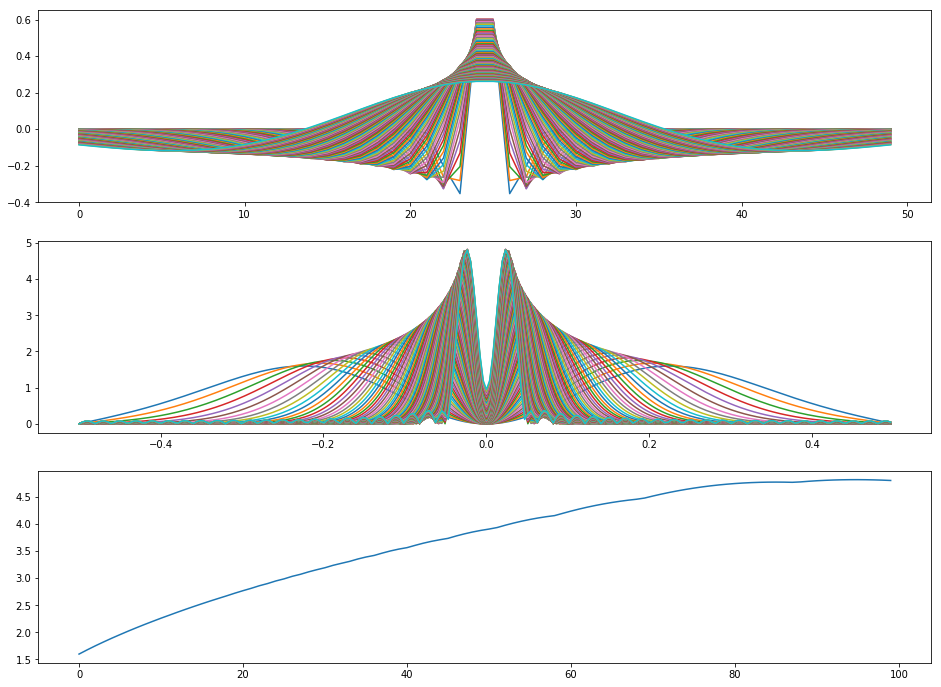

In [190]:
from scipy.signal import cwt, ricker, morlet
from scipy import signal
import numpy as np
from numpy import fft

widths = np.arange(1, 11, 0.1)
Wf = []
for w in widths:
    w = ricker(50, w)
    F = fft.fftshift(fft.fftfreq(256))
    W = fft.fftshift(fft.fft(np.real(w),256))
    
    Wf.append(np.amax(np.abs(W)))
    
    plt.subplot(3,1,1)
    plt.plot(np.real(w))
    plt.subplot(3,1,2)
    plt.plot(F,np.abs(W))
plt.subplot(3,1,3)
plt.plot(Wf)

In [191]:
ptrace = np.zeros(250)
ptrace[0:len(trace)] = trace
cwt_tf = cwt(trace, ricker, np.arange(1, 11, 0.1))

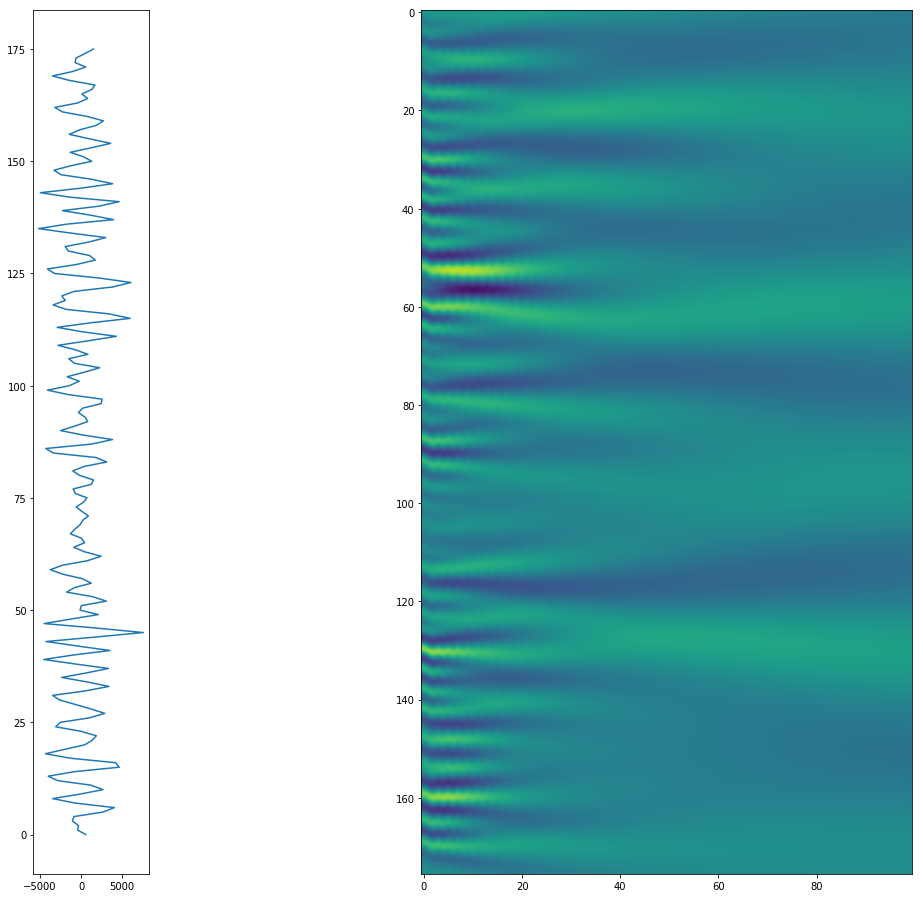

In [195]:
plt.figure()
ax = plt.axes((0,1,0.1,1))
plt.plot(trace, range(0,len(trace)))
ax = plt.axes((0.15,1,0.8,1))
plt.imshow(np.fliplr(cwt_tf).T, interpolation='bicubic')

In [212]:
volume = segyio.tools.cube(seismic_sgy)
print('volume', volume.shape)
cwt_cube = np.zeros((*volume.shape, len(Wf)))
shape = cwt_cube.shape
print('cwt_cube', shape)

for i in range(0, shape[0]):
    for x in range(0, shape[1]):
        trace = np.squeeze(volume[i,x,:])
        c = cwt(trace, ricker, widths)
        cwt_cube[i, x, :, :] = np.fliplr(c).T

volume (226, 251, 176)
cwt_cube (226, 251, 176, 100)


In [213]:
np.save('f3_cwt_cube.npy', cwt_cube)

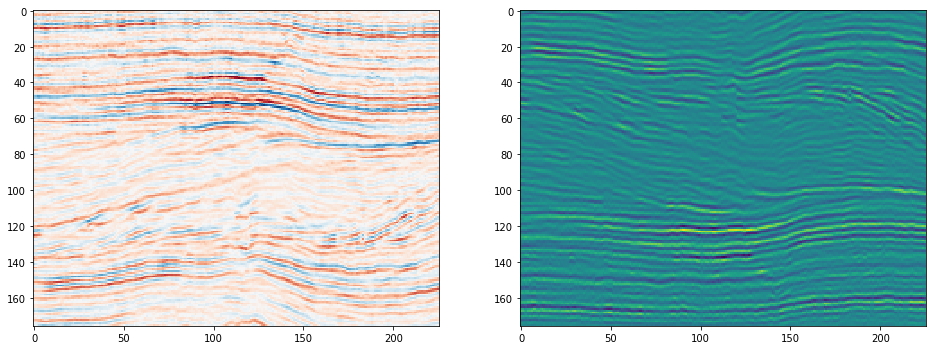

In [215]:
slice = volume[:,50,:]
hyperslice = cwt_cube[:,50,:,0]

plt.subplot(1,2,1)
plt.imshow(slice.T, cmap='RdBu')
plt.subplot(1,2,2)
plt.imshow(np.squeeze(hyperslice).T)

